## **Import Packages**

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import scipy.signal
import tensorflow as tf
max_len = 54240

In [2]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Dataset**

In [3]:
os.listdir("/content/drive/MyDrive/hackathon/dataset")

['Subject62_1547585050',
 'Subject63_1548799263',
 'Subject60_1545247271',
 'Subject60_1545163006',
 'Subject60_1545333478',
 'Subject60_1545420165',
 'Subject59_1544824590',
 'Subject58_1544559925',
 'Subject58_1544473830',
 'Subject59_1544908630',
 'Subject59_1544738633',
 'Subject59_1544647194',
 'Subject56_1540063964',
 'Subject56_1539978092',
 'Subject56_1539890408',
 'Subject57_1541278075',
 'Subject55_1539547951',
 'Subject54_1539203640',
 'Subject56_1539804865',
 'Subject55_1539719868',
 'Subject55_1539632184',
 'Subject54_1539376132',
 'Subject52_1535237040',
 'Subject51_1535140503',
 'Subject53_1538610568',
 'Subject54_1539118066',
 'Subject50_1532981515',
 'Subject50_1532808833',
 'Subject50_1532894944',
 'Subject51_1534797207',
 'Subject51_1534969568',
 'Subject51_1535054192',
 'Subject45_1529693098',
 'Subject45_1529611731',
 'Subject46_1529957047',
 'Subject45_1529525712',
 'Subject44_1529352094',
 'Subject45_1529438294',
 'Subject44_1529265488',
 'Subject44_1529177409',


## **Ground Truth** 

In [4]:
os.listdir("/content/drive/MyDrive/hackathon/ground_truth")

['Subject54_1539288817',
 'Subject55_1539459892',
 'Subject43_1527806941',
 'Subject42_1527280030',
 'Subject39_1526417507',
 'Subject39_1526591202']

In [5]:
df2 = pd.read_csv("/content/drive/MyDrive/hackathon/dataset/Subject17_1536709167/1536709167.csv",names=['SignalValue'])

## **Input**

Enter the BCG csv file and the J peaks csv file if subject is from ground truth. If the subject is from dataset folder then only enter the BCG csv file and ignore J peaks dataframe.

In [6]:

#BCG dataframe
df=pd.read_csv("/content/drive/MyDrive/hackathon/ground_truth/Subject39_1526417507/1526417507.csv",names=['SignalValue'])
#jpeaks fdataframe
jp=pd.read_csv('/content/drive/MyDrive/hackathon/ground_truth/Subject39_1526417507/jpeaks.csv',names=['time_stamp'])
# Enter the unix timestamp in magic_number
magic_number=1526417507
jp['time_stamp']-=magic_number
jp['time_stamp']=jp['time_stamp'].apply(lambda x:round(x*226))
jp

,time_stamp
0,3804
1,4071
2,4315
3,4526
4,4768
...,...
218,53351
219,53546
220,53751
221,53964


In [7]:
# bcg dataframe
df

,SignalValue
0,642
1,659
2,665
3,666
4,663
...,...
54235,540
54236,535
54237,530
54238,526


In [8]:
#Storing J peak values in numpy array
jp[0:len(jp)]
origin = []
for i in range(len(jp)):
  origin.append(jp['time_stamp'][i])
origin = np.array(origin)  
origin

array([ 3804,  4071,  4315,  4526,  4768,  4984,  5211,  5424,  5668,
        5913,  6149,  6394,  6652,  6954,  7215,  7473,  7710,  7991,
        8248,  8481,  8746,  9005,  9235,  9473,  9711,  9934, 10149,
       10403, 10660, 10881, 11103, 11389, 11637, 11867, 12109, 12335,
       12549, 12768, 12998, 13214, 13422, 13796, 14003, 14214, 14443,
       14662, 14871, 15094, 15318, 15531, 15750, 15970, 16192, 16396,
       16614, 16829, 17054, 17268, 17488, 17726, 17947, 18175, 18402,
       18610, 18822, 19045, 19266, 19474, 19696, 19918, 20136, 20569,
       20784, 20996, 21198, 21409, 21616, 21843, 22050, 22258, 22478,
       22690, 22898, 23098, 23290, 23492, 23702, 23903, 24111, 24325,
       24527, 24726, 24937, 25147, 25344, 25535, 25729, 25915, 26102,
       26288, 26485, 26696, 26913, 27339, 27557, 27776, 27970, 28164,
       28364, 28559, 28753, 28936, 29122, 29303, 29485, 29675, 29878,
       30077, 30279, 30501, 30731, 30933, 31118, 31304, 31493, 31683,
       31879, 32113,

In [9]:
#Storing BCG values in numpy array
arr = np.array(df['SignalValue'])
print(arr)
print(len(arr))

[642 659 665 ... 530 526 523]
54240


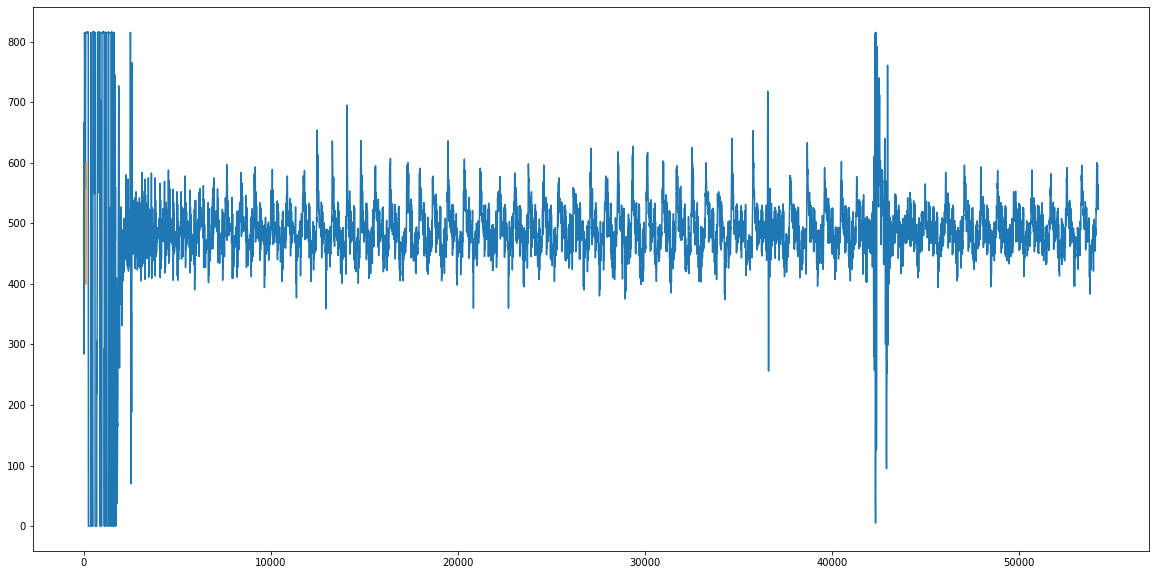

In [97]:
# x stores the number of recordings 
x = range(0,max_len)
# y stores the BCG values while clipping some of the noisy signals
y = []
#x = range(0,max_len)[0:2000]
#y = arr[0:2000]

for i in arr:
  if i<=700 and i>=350:
    y.append(i)
plt.figure(figsize=(20,10))    
plt.plot(x,arr)
#Draw vertical line at any point
def draw_line(point_x=100):
  plt.plot([point_x]*200,range(400,600))
draw_line()
plt.show()  

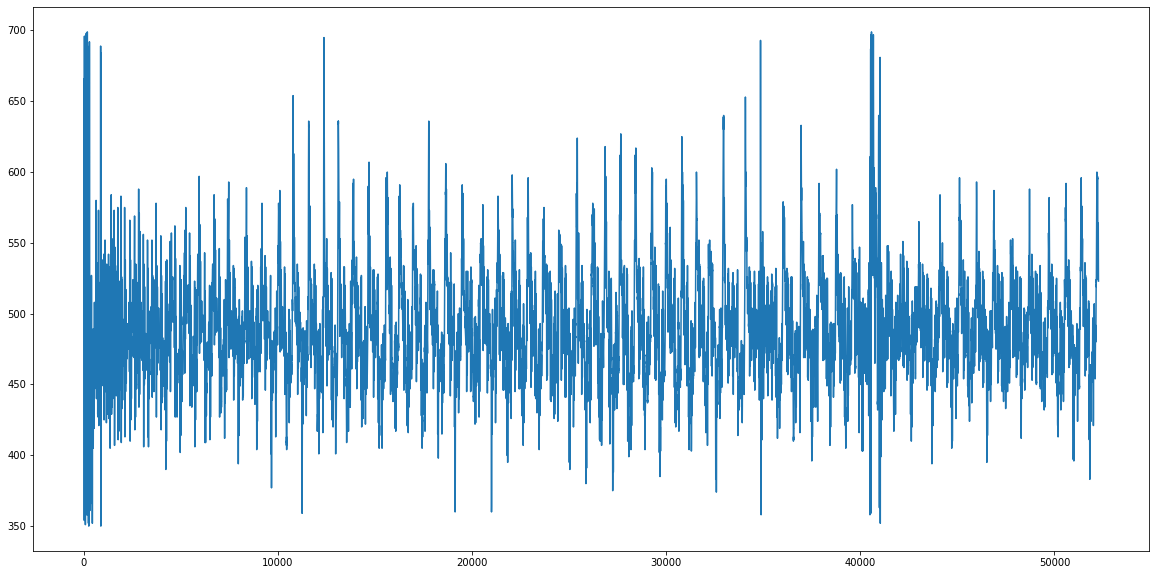

[642 659 665 ... 530 526 523]


In [98]:
y = np.array(y)
plt.figure(figsize=(20,10))
plt.plot(range(len(y)),y)
plt.show()
print(y)

## **Time Series Signal Processing**

In [12]:
from scipy.signal import find_peaks,peak_widths

In [80]:
peaks, _ = find_peaks(y,distance=15,prominence=2,width=10)
#np.diff(peaks)
#plt.plot(peaks, x[peaks], "x")
#plt.show()
print(peaks)
print(len(peaks))

[   26    89   239 ... 52186 52215 52254]
1190


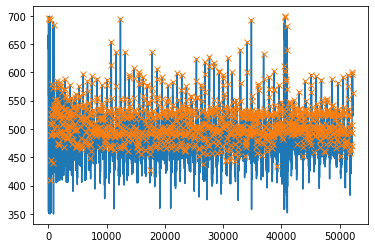

In [81]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.show()

In [15]:
# Selecting j peaks using peak_dist as height difference
# The value of peak_dist was obtained by dragonfly optimization to minimise loss

def select_peak(peaks_list,y,peak_dist):
  glob_max = []
  for i in range(1,len(peaks_list)-1):
    if ((y[peaks_list[i+1]] + peak_dist) < y[peaks_list[i]]) and ((y[peaks_list[i-1]] + peak_dist) < y[peaks_list[i]]) :
      #if (abs((y[peaks_list[i]+2]-y[peaks_list[i]+3]) - (y[peaks_list[i]+3]-y[peaks_list[i]+4])) <= 2) :
      glob_max.append(peaks_list[i])
  return glob_max     

In [87]:
test = select_peak(peaks,y,1)
print(test)
print(len(test))

[283, 387, 541, 629, 750, 883, 937, 1022, 1087, 1175, 1268, 1406, 1558, 1745, 1810, 1908, 2096, 2363, 2526, 2608, 2819, 3061, 3185, 3275, 3502, 3716, 3959, 4441, 4506, 4686, 4943, 5010, 5247, 5442, 5701, 5936, 6218, 6475, 6542, 6707, 6974, 7230, 7298, 7459, 7594, 7699, 7832, 7893, 8007, 8162, 8295, 8373, 8630, 8762, 8954, 9174, 9330, 9461, 9614, 9862, 9931, 10092, 10227, 10335, 10562, 10773, 10994, 11128, 11294, 11385, 11579, 11869, 12154, 12366, 12506, 12639, 12735, 12939, 13108, 13675, 13741, 13888, 14040, 14293, 14483, 14687, 15152, 15331, 15413, 15476, 15561, 15628, 16269, 16682, 16759, 16969, 17113, 17765, 18210, 18427, 18640, 18893, 19076, 19287, 19353, 19489, 19766, 19937, 20340, 20550, 20800, 20899, 21048, 21181, 21333, 21848, 22062, 22225, 22434, 22648, 22884, 23018, 23145, 23258, 23502, 23701, 24020, 24272, 24395, 24461, 24610, 24807, 25051, 25204, 25416, 25484, 25660, 25912, 26065, 26213, 26580, 26640, 26851, 27044, 27290, 27413, 27656, 27842, 27966, 28232, 28432, 28601, 288

In [17]:
y[test[4]]

573

In [18]:
y[test[20]]

588

In [102]:
# Handling problem of very close predictions of j peaks
del_arr = []
for i in range(0,len(test)-1):
  if ((test[i+1]-test[i])<150):
    if (y[test[i]]>y[test[i+1]]):
      #test.remove(test[i+1])
      del_arr.append(test[i+1])
    elif (y[test[i]]<y[test[i+1]]):
      #test.remove(test[i]) 
      del_arr.append(test[i]) 

for i in range(len(del_arr)):
  if del_arr[i] in test:
    test.remove(del_arr[i])
#len(del_arr) 
#len(test) 

In [103]:
print(test)
print(origin)

[283, 629, 883, 1087, 1406, 1558, 1745, 1908, 2096, 2363, 2608, 2819, 3061, 3275, 3502, 3716, 3959, 4506, 4686, 4943, 5247, 5442, 5701, 5936, 6218, 6475, 6707, 6974, 7298, 7459, 7699, 8007, 8373, 8630, 8954, 9174, 9330, 9614, 9931, 10092, 10335, 10562, 10773, 10994, 11294, 11579, 11869, 12154, 12366, 12735, 12939, 13108, 13888, 14040, 14293, 14483, 14687, 15152, 15628, 16269, 16682, 16969, 17765, 18210, 18427, 18640, 18893, 19076, 19489, 19766, 19937, 20340, 20550, 20800, 21181, 21333, 21848, 22062, 22225, 22434, 22648, 22884, 23258, 23502, 23701, 24020, 24272, 24461, 24807, 25051, 25204, 25416, 25660, 25912, 26213, 26640, 26851, 27044, 27413, 27656, 27842, 28232, 28432, 28601, 28822, 29083, 29253, 29409, 29815, 30001, 30201, 30434, 30622, 30803, 31093, 31278, 31555, 31714, 31922, 32234, 32442, 32750, 32958, 33201, 33439, 33673, 33870, 34077, 34281, 34544, 34856, 35216, 35433, 35646, 35825, 36023, 36214, 36719, 36947, 37269, 37677, 37873, 38081, 38602, 38772, 39170, 39397, 39587, 39955

In [24]:
peaks

array([   26,    89,   239, ..., 52186, 52215, 52254])

In [104]:
# handling problem of far apart predictions
for i in range(0,len(test)-1):
  if (test[i+1]-test[i])>300:
    avg = (test[i+1]+test[i])//2
    min = 200
    min_peak = 0
    for j in peaks:
      diff = abs(j-avg)
      if diff<min:
        min = diff
        min_peak = j
    test.append(min_peak)    

In [105]:
test.sort()
test = np.array(test)
test

array([  283,   451,   629,   883,  1087,  1239,  1406,  1558,  1745,
        1908,  2096,  2363,  2608,  2819,  3061,  3275,  3502,  3716,
        3959,  4236,  4506,  4686,  4943,  5071,  5247,  5442,  5701,
        5936,  6218,  6475,  6707,  6974,  7138,  7298,  7459,  7699,
        7862,  8007,  8195,  8373,  8630,  8762,  8954,  9174,  9330,
        9614,  9787,  9931, 10092, 10335, 10562, 10773, 10994, 11294,
       11579, 11869, 12154, 12366, 12538, 12735, 12939, 13108, 13453,
       13888, 14040, 14293, 14483, 14687, 14906, 15152, 15377, 15628,
       15935, 16269, 16467, 16682, 16969, 17367, 17765, 17988, 18210,
       18427, 18640, 18893, 19076, 19287, 19489, 19766, 19937, 20121,
       20340, 20550, 20800, 21015, 21181, 21333, 21581, 21848, 22062,
       22225, 22434, 22648, 22884, 23083, 23258, 23502, 23701, 23858,
       24020, 24272, 24461, 24645, 24807, 25051, 25204, 25416, 25660,
       25912, 26065, 26213, 26400, 26640, 26851, 27044, 27258, 27413,
       27656, 27842,

In [28]:
#predicted j peaks list
print(f'Number of predicted J peaks : {len(test)}')

Number of predicted J peaks : 246


In [29]:
#actual j peaks list
print(f'Number of given J peaks : {len(origin)}')

Number of given J peaks : 223


## **J peaks Array**

In [30]:
jpeaks_arr = []
for i in test:
  jpeaks_arr.append(y[i])
len(jpeaks_arr)  
len(test)

246

In [31]:
jpeaks_arr

[692,
 489,
 580,
 684,
 552,
 491,
 584,
 573,
 575,
 583,
 575,
 566,
 569,
 588,
 556,
 552,
 552,
 578,
 555,
 537,
 557,
 562,
 534,
 474,
 575,
 557,
 523,
 597,
 543,
 520,
 584,
 546,
 474,
 524,
 593,
 534,
 494,
 510,
 488,
 589,
 537,
 494,
 520,
 578,
 541,
 527,
 487,
 516,
 587,
 533,
 503,
 654,
 535,
 490,
 636,
 535,
 493,
 695,
 532,
 529,
 492,
 636,
 520,
 595,
 540,
 527,
 505,
 607,
 531,
 528,
 475,
 600,
 456,
 591,
 534,
 510,
 578,
 527,
 636,
 531,
 516,
 487,
 606,
 543,
 521,
 500,
 591,
 530,
 533,
 497,
 520,
 577,
 531,
 467,
 511,
 583,
 529,
 493,
 598,
 552,
 531,
 507,
 596,
 523,
 530,
 493,
 575,
 534,
 530,
 516,
 559,
 532,
 534,
 486,
 496,
 624,
 534,
 503,
 502,
 578,
 509,
 486,
 618,
 530,
 456,
 515,
 627,
 534,
 499,
 502,
 617,
 539,
 533,
 498,
 603,
 547,
 521,
 516,
 595,
 561,
 532,
 511,
 625,
 534,
 495,
 600,
 535,
 525,
 487,
 552,
 504,
 468,
 503,
 640,
 532,
 529,
 531,
 481,
 653,
 533,
 530,
 494,
 693,
 533,
 526,
 528,
 532

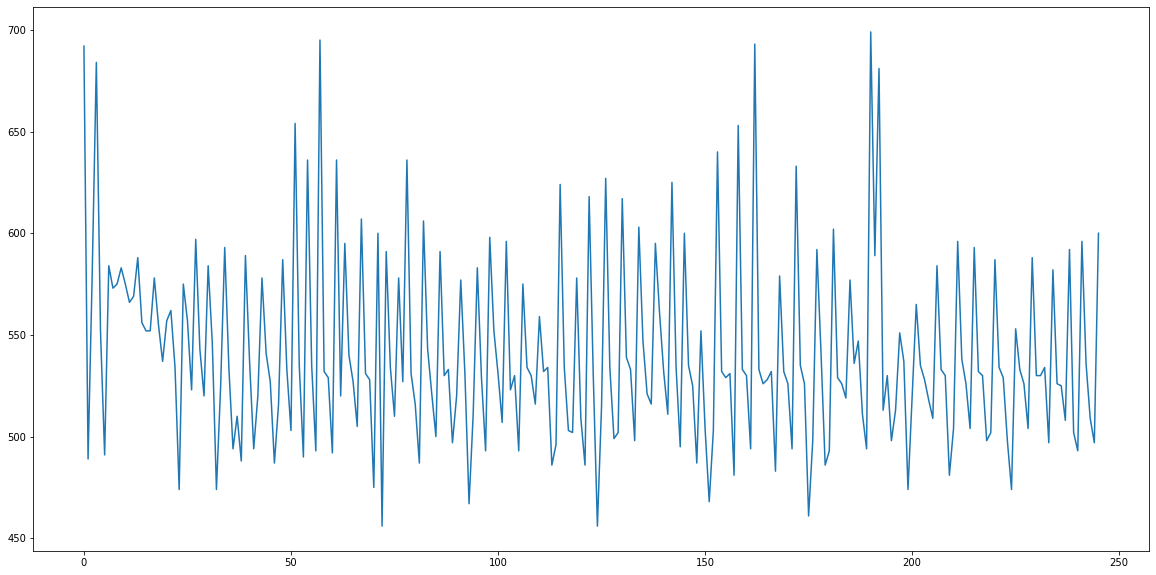

In [32]:
plt.figure(figsize=(20,10))
plt.plot(jpeaks_arr)
plt.show()

## **Interpolating Linear Space**

In [33]:

jpeak_x=test.copy()
jpeak_y=jpeaks_arr.copy()
space=[]
jpeak_len=len(jpeak_x)
for j in range(jpeak_x[0]):
  # space.append(0)
  space.append(np.nan)
for i in range(jpeak_len-1):
  # space.append(jpeak_y[i])
  delta=(jpeak_y[i+1]-jpeak_y[i])/(jpeak_x[i+1]-jpeak_x[i])
  for j in range(jpeak_x[i+1]-jpeak_x[i]):
    space.append(jpeak_y[i]+j*delta)
space.append(jpeak_y[-1])
for j in range(jpeak_x[-1]+1,54240):
  # space.append(0)
  space.append(np.nan)
print(len(space))
print(space)

54240
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

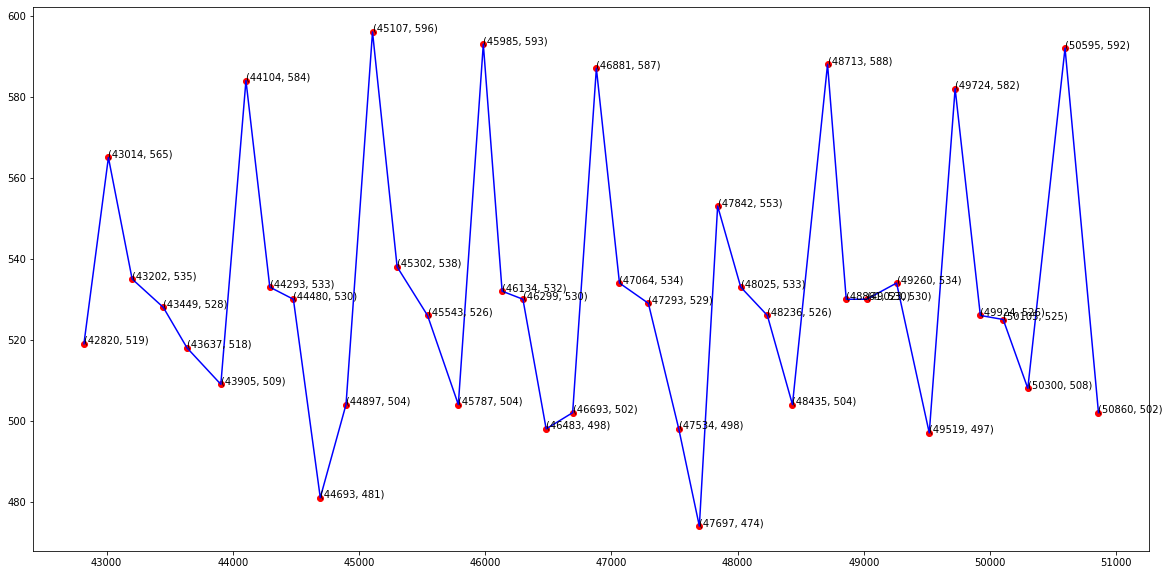

In [34]:
plt.figure(figsize=(20,10))
plt.plot(test[200:240],jpeaks_arr[200:240],color="blue")
plt.scatter(test[200:240],jpeaks_arr[200:240],color="red")
for i in zip(test[200:240],jpeaks_arr[200:240]):
  plt.annotate(str(i),i)
plt.show()

In [35]:
print(jpeaks_arr)

[692, 489, 580, 684, 552, 491, 584, 573, 575, 583, 575, 566, 569, 588, 556, 552, 552, 578, 555, 537, 557, 562, 534, 474, 575, 557, 523, 597, 543, 520, 584, 546, 474, 524, 593, 534, 494, 510, 488, 589, 537, 494, 520, 578, 541, 527, 487, 516, 587, 533, 503, 654, 535, 490, 636, 535, 493, 695, 532, 529, 492, 636, 520, 595, 540, 527, 505, 607, 531, 528, 475, 600, 456, 591, 534, 510, 578, 527, 636, 531, 516, 487, 606, 543, 521, 500, 591, 530, 533, 497, 520, 577, 531, 467, 511, 583, 529, 493, 598, 552, 531, 507, 596, 523, 530, 493, 575, 534, 530, 516, 559, 532, 534, 486, 496, 624, 534, 503, 502, 578, 509, 486, 618, 530, 456, 515, 627, 534, 499, 502, 617, 539, 533, 498, 603, 547, 521, 516, 595, 561, 532, 511, 625, 534, 495, 600, 535, 525, 487, 552, 504, 468, 503, 640, 532, 529, 531, 481, 653, 533, 530, 494, 693, 533, 526, 528, 532, 483, 579, 532, 526, 494, 633, 535, 526, 461, 498, 592, 541, 486, 493, 602, 529, 526, 519, 577, 536, 547, 511, 494, 699, 589, 681, 513, 530, 498, 513, 551, 537, 474,

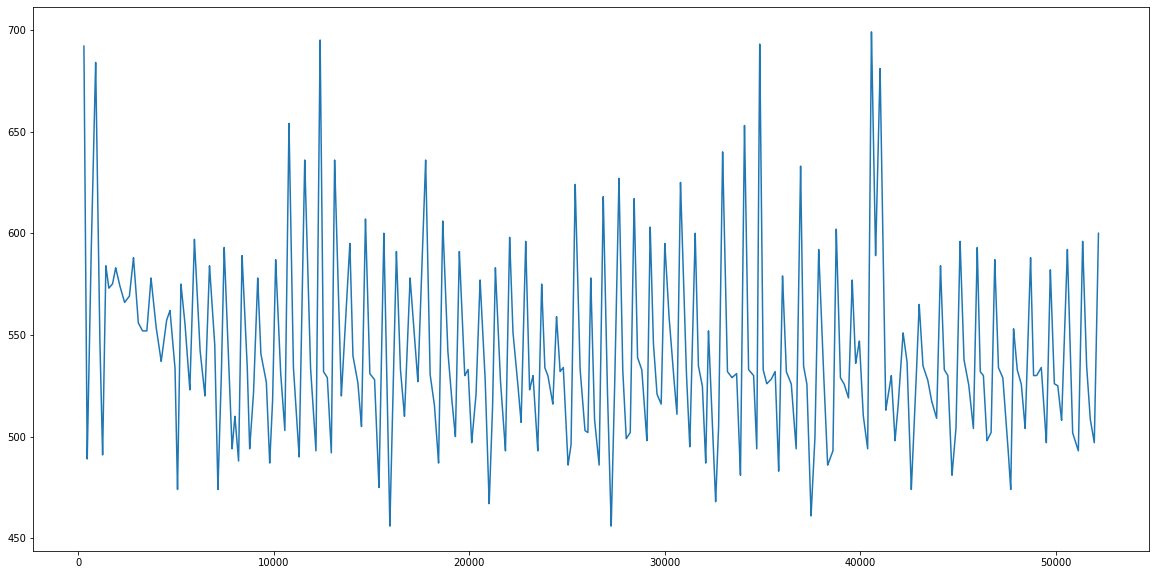

In [36]:
plt.figure(figsize=(20,10))
plt.plot(range(54240),space,'-')
plt.show()

In [37]:
jpeak,_ = find_peaks(jpeaks_arr)
# print([test[i] for i in jpeak])
# print(df.iloc[:,0])
width = peak_widths(space,[test[i] for i in jpeak], rel_height=1, prominence_data=None, wlen=None)

In [38]:
width[0]

array([ 4588.        ,   989.32258065,   597.33333333,  3795.73333333,
         503.16666667,   679.46428571,   544.61386139,  2067.        ,
         558.22222222,  2607.4       ,   281.72727273,  1587.675     ,
         994.725     ,   695.55172414,  1492.10344828,   854.14383562,
        8758.625     ,  2365.83018868,   900.45454545,   766.64150943,
         517.49305556,   613.4       ,   613.25      , 11323.        ,
        2520.8125    ,   818.66666667,   186.33333333,   793.21875   ,
         734.90909091,  3964.31818182,   761.67567568,   221.16216216,
        1513.41666667,   626.5       ,   172.16666667,  6211.18918919,
         408.04347826,   531.24324324,  5311.47457627,  1047.54285714,
        1517.95238095,   762.23809524,  2180.76923077,   779.        ,
         424.08333333,  1213.65714286,   241.88      ,   818.35465116,
       10210.86440678,   451.91836735,   871.3125    ,  1584.90769231,
         717.24324324,  1774.44036697,   705.        ,   248.75      ,
      

## **Breathing Rate Calculation**

In [39]:
breath_rate = []
for i in width[0]:
  i /= 226
  i = 60/i
  breath_rate.append(i)
breath_rate  

[2.955536181342633,
 13.706348430010761,
 22.700892857142815,
 3.5724322045805814,
 26.94932096720767,
 19.956898817345607,
 24.89837472275752,
 6.56023222060958,
 24.29140127388533,
 5.200582956201581,
 48.13165537270083,
 8.540790778969251,
 13.631908316368841,
 19.4953150562689,
 9.087841741582121,
 15.875546289242617,
 1.5481882144743038,
 5.7316032506838726,
 15.059061080262486,
 17.687536916715878,
 26.203250177807046,
 22.106292794261506,
 22.11169995923359,
 1.1975624834407843,
 5.379218010066199,
 16.563517915309422,
 72.77280858676255,
 17.09490603947524,
 18.45126175160809,
 3.4205125265149356,
 17.802852884820073,
 61.31247708664268,
 8.95985903859919,
 21.644054269752594,
 78.7608906098736,
 2.183156813771136,
 33.23175279701663,
 25.525030525030523,
 2.5529633636163473,
 12.94457778747546,
 8.933086551432064,
 17.789716998813017,
 6.217989417989419,
 17.406931964056483,
 31.974847710748765,
 11.172842412542952,
 56.06085662311951,
 16.56983311664778,
 1.3279972644624123,


In [40]:
mappa=dict()
step=5
for i in breath_rate:
  temp_index=int(i/step)
  if mappa.get(temp_index) is None:
    mappa[temp_index]=[]
  mappa[temp_index].append(i)
perc_map=dict()
for i in mappa.items():
  perc_map[i[0]]=len(i[1])*100/len(breath_rate)
  print(i[0],len(i[1])*100/len(breath_rate))
clean_rate=[]
for i in breath_rate:
  temp_index=int(i/step)
  if perc_map[temp_index]>30:
    clean_rate.append(i)
# print(clean_rate)
clean_rate=np.array(clean_rate)
print(np.mean(clean_rate))


0 15.492957746478874
2 8.450704225352112
4 9.859154929577464
5 4.225352112676056
3 26.760563380281692
1 18.309859154929576
9 1.408450704225352
14 1.408450704225352
12 1.408450704225352
15 1.408450704225352
6 5.633802816901408
11 1.408450704225352
10 2.816901408450704
7 1.408450704225352
nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [41]:
print(np.std(breath_rate))

16.41599316765976


In [42]:
breath_rate = np.array(breath_rate)
mean = np.mean(breath_rate)
mean

19.162789413927666

## **Graphs of BCG and J peaks**

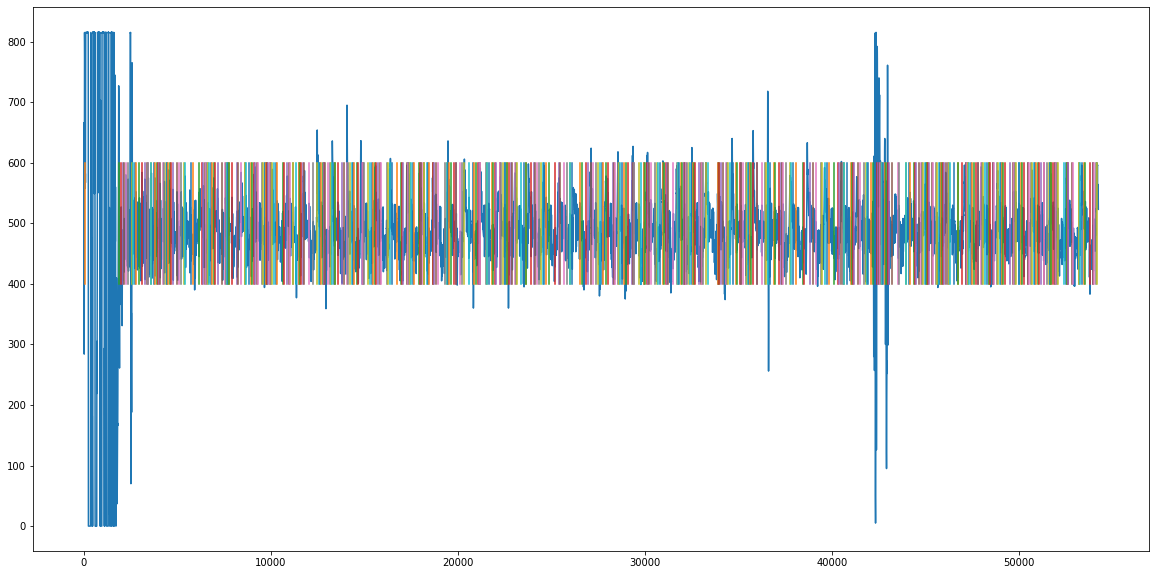

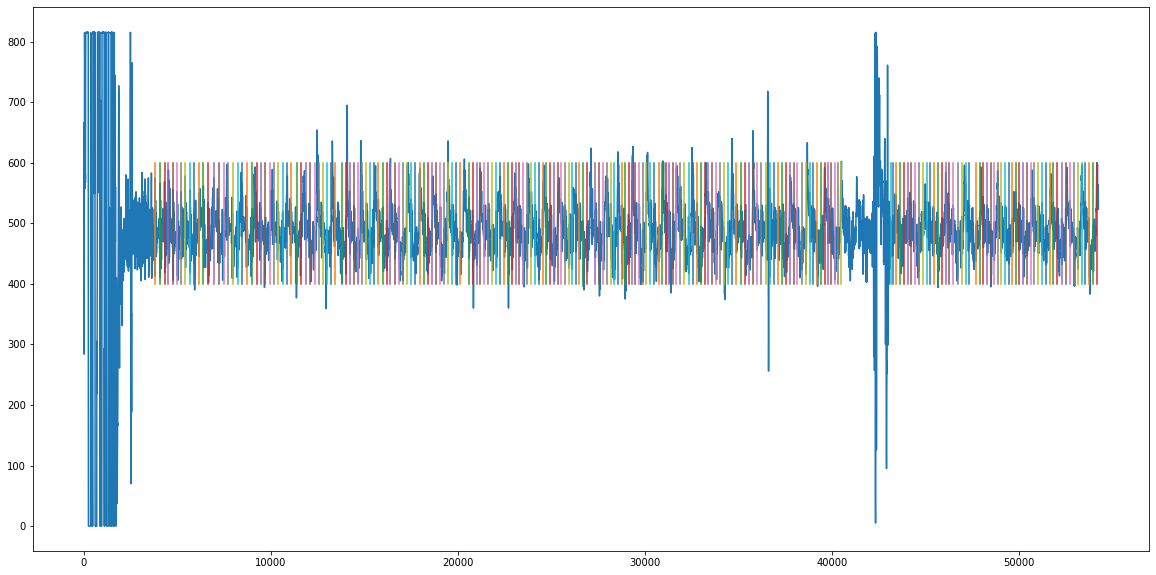

In [78]:
#Predicted
plt.figure(figsize=(20,10))
plt.plot(x,arr)
def draw_line(point_x=312):
  plt.plot([point_x]*200,range(400,600))
for i in test:
  draw_line(i)
plt.show() 

#Original
plt.figure(figsize=(20,10))
plt.plot(x,arr)
def draw_line(point_x=312):
  plt.plot([point_x]*200,range(400,600))
for i in origin:
  draw_line(i)
plt.show() 

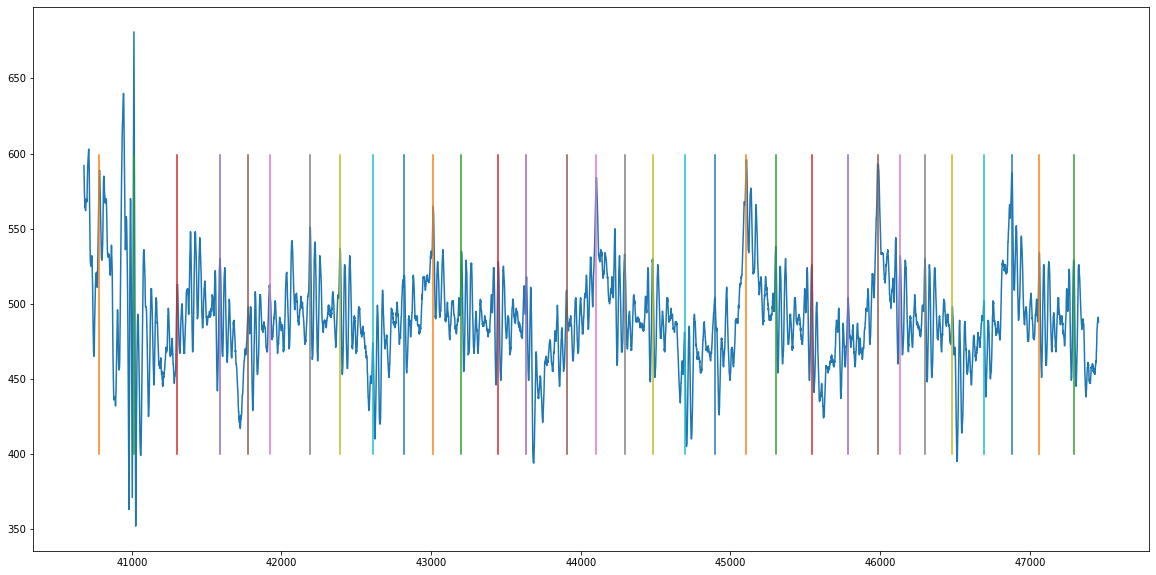

In [44]:
plt.figure(figsize=(20,10))
x1 = x[40680:47460]
y1 = y[40680:47460]
plt.plot(x1,y1)
def draw_line(point_x=312):
  plt.plot([point_x]*200,range(400,600))
for i in test:
  if i>40680 and i<47460:
    draw_line(i)
plt.show() 

## **Heart Rate Calculation**

In [114]:
def heart_rate(peak):
  diff_arr=[]
  for i in range(len(peak)-1):
    diff_arr.append(peak[i+1]-peak[i])
  diff_arr=np.array(diff_arr)
  # diff_arr=diff_arr/226
  # # print(diff_arr/226)
  # # print(diff_arr.mean())
  # print(sum(diff_arr)*2)

  diff_arr=226/diff_arr
  return(60*diff_arr.mean())

#given heart rate
print("Given heart rate calculated using jpeaks.csv file     ---> ", end="")
print(heart_rate(origin))
#predicted heart rate
print("Predicted heart rate calculated using signal analysis ---> ", end="")
print(heart_rate(test))

Given heart rate calculated using jpeaks.csv file     ---> 63.64173678070116
Predicted heart rate calculated using signal analysis ---> 66.32368162898528


## **Model to detect J-peak inside a Window**

In [46]:
import tensorflow as tf

In [47]:
model = tf.keras.models.load_model("/content/drive/MyDrive/predictor2")

In [48]:
#enter value from where you want to start detecting j peak
start = 25000
#enter value till where you want to detect j peak
end = 30000
x_arr = []
y_arr = []
win_size = 50
for i in range(start,end,win_size):
  j = arr[i:i+win_size]/1000
  x_arr.append(i+win_size)
  j = np.array(j)
  j = np.reshape(j,(1,win_size))
  print(f'Probability of occurance of J peak within {i} and {i+win_size} = {model(j)[1].numpy()[0][0]}')
  y_arr.append(model(j)[1].numpy()[0][0])


Probability of occurance of J peak within 25000 and 25050 = 0.0003006160259246826
Probability of occurance of J peak within 25050 and 25100 = 0.0018593072891235352
Probability of occurance of J peak within 25100 and 25150 = 0.00579872727394104
Probability of occurance of J peak within 25150 and 25200 = 0.11244961619377136
Probability of occurance of J peak within 25200 and 25250 = 0.1298757791519165
Probability of occurance of J peak within 25250 and 25300 = 0.0010724365711212158
Probability of occurance of J peak within 25300 and 25350 = 0.48517459630966187
Probability of occurance of J peak within 25350 and 25400 = 0.2972663640975952
Probability of occurance of J peak within 25400 and 25450 = 0.004590094089508057
Probability of occurance of J peak within 25450 and 25500 = 0.0047810375690460205
Probability of occurance of J peak within 25500 and 25550 = 0.2878667116165161
Probability of occurance of J peak within 25550 and 25600 = 0.7313497066497803
Probability of occurance of J peak 

In [54]:
#Clipping low values of probability of j peak occurance
y_arr_2 = []
for i in y_arr:
  if i>0.6:
    y_arr_2.append(i)
  else:
    y_arr_2.append(0)  

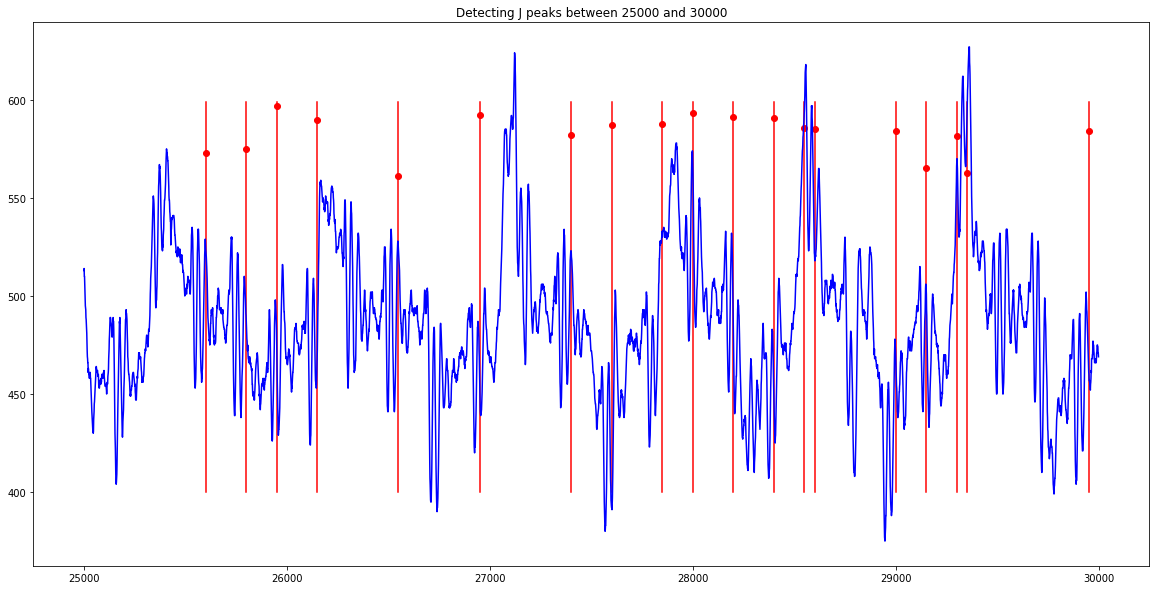

In [73]:
#plt.plot(x_arr,y_arr_2)
plt.figure(figsize=(20,10))
plt.title(f'Detecting J peaks between {start} and {end}')
#plt.scatter(x_arr, [(i*100 + 500) for i in y_arr_2], color='red')
def draw_line(point_x=312):
  plt.plot([point_x]*200,range(400,600), color="red")
for i in range(len(x_arr)):
  if y_arr[i]>0.6:
    draw_line(x_arr[i])
    plt.scatter(x_arr[i],(y_arr[i]*100 + 500), color='red')
#plt.plot(test[112:139],jpeaks_arr[112:139])
plt.plot(x[25000:30000],arr[25000:30000], color="blue")
plt.show()

## **Objective Function**

In [74]:
def objective_func(listy):
  distance=round(listy[0])
  peak_dist=listy[1] #round(listy[1])

  peaks, _ = find_peaks(arr,distance)
  test=select_peak(peaks,arr,peak_dist)
  
  algo_y=set(test)
  
  # algo=select_peak(peaks,)
  # algo_y=[i for i in algo['signals'] if int(i)==1]
  score=0
  temp_window=100
  setto=set(map(int,jp['time_stamp'])) # original peaks
  setto_predict=set(map(int,algo_y)) #predicted peaks

  #predicted jpeaks but not in actual
  print(len(setto_predict),len(setto))
  for i in algo_y:
    i=int(i)
    inni=False
    for j in range(i-temp_window,i+temp_window+1):
      if j in setto:
        inni=True
        break
    if not inni:
      score+=1

  # did not predict jpeaks but in actual
  for i in setto:
    i=int(i)
    inni=False
    for j in range(i-temp_window,i+temp_window+1):
      if j in setto_predict:
        inni=True
        break
    if not inni:
      score+=1

  return score

## **Dragonfly Optimization**

In [75]:
class dragonfly:
  def Levy(self,dim):
    beta=1.5
    sigma=((math.gamma(1+beta)*math.sin(math.pi*beta/2))/(math.gamma((1+beta)/2)*beta*(2**((beta-1)/2))))**(1/beta)
    r1=random.random()
    r2=random.random()
    return 0.01*((r1*sigma)/(r2**(1/beta)))

  def dist_of_all_dim(self,dim,arr1,arr2):
    ans=np.zeros((dim))
    for i in range(0,dim):
      ans[i]=math.fabs(arr1[i]-arr2[i])
    return ans
  
  def is_neighbour(self,dim,arr1,arr2,r):
    same=0
    #checks over all the dimensions and sees if it is in range and also sees if all
    #the locations are exactly same. If so, then returns false otherwise true.
    for i in range(0,dim):
      diff_val=math.fabs(arr1[i]-arr2[i])
      # print(f"type of diff_val: {type(diff_val)}")
      # print(f"type of r: {type(r)}")
      if diff_val>r[i]:
        return False
      if diff_val==0:
        same+=1
    if(same==dim):
      return False
    else:
      return True

  def initialize(self,n,dim,ub,lb):
    ans=np.zeros((n,dim),dtype="float")
    #randomly generating all the elements
    for i in range(0,n):
      for j in range(0,dim):
        #point to note: rand(a,b) means [a,b] both ranges inclusive
        ans[i][j]=(random.random())*(ub[j]-lb[j])+lb[j]
    return ans

  def find_neighbours(self,pop,agent,r):
    neighbours = []
    for i in range(np.shape(pop)[0]):
        if self.is_neighbour(np.shape(pop)[1],agent,pop[i],r):
            neighbours.append(i)
    neighbour_list = np.zeros(len(neighbours),dtype="int")
    for i in range(len(neighbours)):
        neighbour_list[i] = neighbours[i]
    return neighbour_list
    #fixed bugs but still not tested as a whole
  def altruism(self,obj,dragonflies,rang,food,f_factor,enemy,e_factor,lb,ub):

      agents = dragonflies.copy()
      rows,cols = np.shape(agents)
      
      #find altruist i.e., the worst dragonfly
      altruist = 0
      altruist_fit = obj(agents[altruist])
      for i in range(1,rows):
        if obj(agents[i]) > altruist_fit:
          altruist = i
          alturist_fit = obj(agents[i])

      #find all neighbours of altruist
      """neighbours = []
      for i in range(rows):
        if i == altruist:
          continue
        if self.is_neighbour(cols,agents[altruist],agents[i],rang):
          neighbours.append(i)"""
      neighbours = self.find_neighbours(agents,agents[altruist],rang)

      if len(neighbours) == 0:
        return dragonflies
      
      #find beneficiary
      beneficiary = np.random.randint(0,len(neighbours))

      fitness_alt = altruist_fit
      # fitness_ben = obj(beneficiary)
      fitness_ben=obj(agents[beneficiary])

      #find Hamilton equation's factor
      distance = np.zeros(cols)
      for i in range(cols):
        distance[i] = abs(agents[altruist][i]-agents[beneficiary][i])

      #closer the beneficiary, lesser the scaling required
      #second part will always be less than 1
      r = 1 - np.sum(distance)/np.sum(rang)

      #generate a random number for the food offset
      dist1 = self.dist_of_all_dim(cols,food,agents[altruist])
      dist2 = self.dist_of_all_dim(cols,food,agents[beneficiary])
      dist3 = self.dist_of_all_dim(cols,enemy,agents[altruist])
      dist4 = self.dist_of_all_dim(cols,enemy,agents[beneficiary])

      for i in range(cols):

        offset = np.random.uniform(low=0,high=min(abs(dist1[i]),abs(dist2[i]),abs(rang[i])))

        #need not change delta as it will anyways change on next iteration
        agents[altruist][i] += (f_factor*offset)
        agents[beneficiary][i] -= (f_factor*offset)

        offset = np.random.uniform(low=0,high=min(abs(dist3[i]),abs(dist4[i]),abs(rang[i])))

        #need not change delta as it will anyways change on next iteration
        agents[altruist][i] -= (e_factor*offset)
        agents[beneficiary][i] += (e_factor*offset)

      #perform clipping
      for i in range(cols):
        agents[altruist][i] = min(agents[altruist][i],ub[i])
        agents[altruist][i] = max(agents[altruist][i],lb[i])
        agents[beneficiary][i] = min(agents[beneficiary][i],ub[i])
        agents[beneficiary][i] = max(agents[beneficiary][i],lb[i])

      #check if altruism is successful
      # benefit = obj(beneficiary)
      benefit=obj(agents[beneficiary])
      # cost = obj(altruist)
      cost=obj(agents[altruist])
      if benefit-fitness_ben <= 0 and cost-fitness_alt >= 0:
        benefit = fitness_ben - benefit
        cost = cost - fitness_alt
      else:
        return dragonflies
      if r*benefit > cost:
        return agents
      else:
        return dragonflies

  def optimize(self,obj,dim,bound,n,max_it):
    #getting the dimensions
    # dim=np.size(bound)[2]
    ub=np.zeros((dim),dtype="float")
    lb=ub.copy()
    
    #setting the values of the range
    for i in range(0,dim):
      lb[i]=bound[i][0]
      ub[i]=bound[i][1]
    
    #setting the initial r. In paper code, this magic_r_val was 10
    magic_r_val=10
    r=(ub-lb)/magic_r_val
    delta_max=(ub-lb)/magic_r_val
    
    #should I set the best and worst fitness as the enemy and food respectively at the begining???

    #setting the enemy and food fitness
    food_fitness=np.inf
    enemy_fitness=-np.inf
    #setting the initial food and enemy position
    #maybe change it to better suit the needs
    food_pos=np.zeros((dim),dtype="float")
    enemy_pos=np.zeros((dim),dtype="float")
    
    #initializing the dragonflies X aka positions
    x=self.initialize(n,dim,ub,lb)
    #probably change this
    delta_x=self.initialize(n,dim,ub,lb)

    #main loop
    for iter in range(1,max_it+1):

      #a lot of magic numbers here
      r=(ub-lb)/4+((ub-lb)*(iter/max_it)*2)

      w=0.9-iter*((0.9-0.4)/max_it)
        
      my_c=0.1-iter*((0.1-0)/(max_it/2))
      if(my_c<0):
        my_c=0
      s=2*(random.random())*my_c
      a=2*(random.random())*my_c
      c=2*(random.random())*my_c
      f=2*(random.random());     
      e=my_c
      fitness_prev=np.zeros((n))
      #calculating the fitness values of the dragonflies
      for i in range(0,n):
        cur_fitness=obj(x[i,:])
        fitness_prev[i]=cur_fitness
        print(f"cur_fitness for {i} with {x[i,:]}: {cur_fitness}")
        #possible confusion about bound checking here
        #i deemed that not useful
        if cur_fitness>enemy_fitness:
          enemy_fitness=cur_fitness
          enemy_pos=x[i,:].copy()
        if cur_fitness<food_fitness:
          print(f"for updation: {cur_fitness}, {food_fitness}")
          food_fitness=cur_fitness
          food_pos=x[i,:].copy()
      print(f"in loop {iter}, fit: {food_fitness}, loc: {food_pos}")
      #updating the dragonflies one by one
      for i in range(0,n):
        # #calculating the neighbours
        # total_neighbour=0
        # neighbour_index=np.zeros((n),dtype="int")
        # for j in range(0,n):
        #   if self.is_neighbour(dim,x[i,:],x[j,:],r):
        #     neighbour_index[total_neighbour]=j
        #     total_neighbour+=1
        neighbour_index = self.find_neighbours(x,x[i],r)
        total_neighbour = len(neighbour_index)
        #calculating the s,c,a,f,e parameters
        #possible confusion:
        #the default case should be done when number of neighbours ==0 ( but it is given as 1 in the paper code)

        #s
        #huge problem in the S calculation paper says x[k]-x but code from other source says x-x[k]
        Separation=np.zeros((dim),dtype="float")
        for k in range(0,total_neighbour):
          # print(f"type of nei_index: {np.shape(neighbour_index)}")
          Separation+=x[neighbour_index[k],:]-x[i,:]
        #a
        Alignment=np.zeros((dim),dtype="float")
        if total_neighbour>0:
          for k in range(0,total_neighbour):
            Alignment+=delta_x[neighbour_index[k],:]
          Alignment/=total_neighbour
        else:
          Alignment=delta_x[i,:].copy()
        #c
        Cohesion=np.zeros((dim),dtype="float")
        if total_neighbour>0:
          for k in range(0,total_neighbour):
            Cohesion+=x[neighbour_index[k],:]
          Cohesion/=total_neighbour
        else:
          Cohesion=x[i,:].copy()
        Cohesion-=x[i,:]
        #f
        dist_to_food=self.dist_of_all_dim(dim,food_pos.copy(),x[i,:])
        Food_attr=np.zeros((dim),dtype="float")
        #checking if food is in reach
        if np.shape(np.where(dist_to_food<=r))[1]==dim: #careful with the expr
          Food_attr=food_pos.copy()-x[i,:]
        #e
        dist_to_enemy=self.dist_of_all_dim(dim,enemy_pos.copy(),x[i,:])
        Enemy_attr=np.zeros((dim),dtype="float")
        #checking if enemy is in reach
        if np.shape(np.where(dist_to_enemy<=r))[1]==dim: #careful with the expr
          Enemy_attr=enemy_pos.copy()+x[i,:]
        
        #clipping but it looks very fishy. because >ub becomes lb and <lb becomes ub
        for j in range(0,dim):
          if x[i,j]>ub[j]:
            x[i,j]=lb[j] #check
            delta_x[i,j]=random.random()
          if x[i,j]<lb[j]:
            x[i,j]=ub[j] #check
            delta_x[i,j]=random.random()
        
        #checking to see if any food_dimension in out of reach
        if np.shape(np.where(Food_attr>r))[1]>0: #careful with the expr
          if total_neighbour>0:
            for j in range(0,dim):
              delta_x[i,j]=w*delta_x[i,j]+(random.random())*Alignment[j]+(random.random())*Cohesion[j]+(random.random())*Separation[j]
              if delta_x[i,j]>delta_max[j]:
                delta_x[i,j]=delta_max[j]
              if delta_x[i,j]<-delta_max[j]:
                delta_x[i,j]=-delta_max[j]
              x[i,j]+=delta_x[i,j]
          else:
            x[i,:]+=self.Levy(dim)*x[i,:]#need to implement levy
            delta_x[i,:]=np.zeros((dim),dtype="float")
        else:
          for j in range(0,dim):
            delta_x[i,j]=(a*Alignment[j]+c*Cohesion[j]+s*Separation[j]+f*Food_attr[j]+e*Enemy_attr[j])+w*delta_x[i,j]
            if delta_x[i,j]>delta_max[j]:
              delta_x[i,j]=delta_max[j]
            if delta_x[i,j]<-delta_max[j]:
              delta_x[i,j]=-delta_max[j]
            x[i,j]+=delta_x[i,j]

        
        #temporary clipping
        for j in range(0,dim):
          if x[i,j]>ub[j]:
            x[i,j]=ub[j]
          if x[i,j]<lb[j]:
            x[i,j]=lb[j]
        # print(f"cur x val for {i} : {x[i,:]}")


        #there were these 3 lines of matlab code that I could not decipher:
        #didn't understand what they do

        # Flag4ub=X(:,i)>ub';
        # Flag4lb=X(:,i)<lb';
        # X(:,i)=(X(:,i).*(~(Flag4ub+Flag4lb)))+ub'.*Flag4ub+lb'.*Flag4lb;
      
      #if altruism worked
      #  temp_pop=self.altruism(obj,x,r,food_pos,f,enemy_pos,e,lb,ub)
      # if(min([obj(i) for i in temp_pop])<min([obj(i) for i in x])):
      #   x=temp_pop.copy()

      #altruism call
      #opportunistic altruism 
      # temp_pop=self.altruism(obj,x,r,food_pos,f,enemy_pos,e,lb,ub)
      # fitness_new=np.zeros((n))
      # for t in range(0,n):
      #   fitness_new[t]=obj(temp_pop[t,:])
      #   # fitness_prev[t]=obj(x[t,:])
      # if(min(fitness_new)<min(fitness_prev)):
        # x=temp_pop
      #
      #x = self.altruism(obj,x,r,food_pos,f,enemy_pos,e,lb,ub)
    return food_pos,food_fitness #returning loc and fit      

In [76]:
drag=dragonfly()
bounds=[
    (1,100),# (10,30),
    (1,100)# (30,50)
]
loc,fit=drag.optimize(obj=objective_func,dim=len(bounds),bound=bounds,n=20,max_it=30)
print(f"fitness is: {fit}")
print(f"loc is : {loc}")

127 223
cur_fitness for 0 with [38.8118579  20.65572617]: 164
for updation: 164, inf
8 223
cur_fitness for 1 with [28.20864847 78.1639526 ]: 227
7 223
cur_fitness for 2 with [84.33536469 83.60264042]: 226
18 223
cur_fitness for 3 with [70.11675103 55.68011316]: 224
98 223
cur_fitness for 4 with [14.25471514 24.9980187 ]: 182
436 223
cur_fitness for 5 with [99.60469156  3.78092836]: 76
for updation: 76, 164
11 223
cur_fitness for 6 with [67.00795363 65.83368068]: 225
8 223
cur_fitness for 7 with [53.15216708 77.48092986]: 227
10 223
cur_fitness for 8 with [82.73056799 67.84315802]: 226
7 223
cur_fitness for 9 with [ 5.55091549 84.92355996]: 226
27 223
cur_fitness for 10 with [24.80346734 49.53903021]: 218
106 223
cur_fitness for 11 with [62.12941007 22.02725832]: 176
18 223
cur_fitness for 12 with [64.63856587 55.0592253 ]: 224
7 223
cur_fitness for 13 with [91.77656934 84.93622137]: 226
5 223
cur_fitness for 14 with [ 3.09387213 95.40525426]: 226
101 223
cur_fitness for 15 with [77.557

518


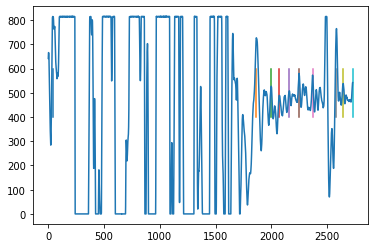

In [77]:
distance=loc[0]
peak_dist=loc[1]

peaks,_=find_peaks(arr,distance)
test=select_peak(peaks,arr,peak_dist)

def draw_line(point_x):
  plt.plot([point_x]*200,range(400,600))
print(len(test))
maxi=max(test[:10])
for i in test[:10]:
  draw_line(i)
plt.plot(df.index[:maxi+1],df.loc[:maxi,'SignalValue'])
plt.show()

## **Conclusion**

In [120]:
print("-------------Final Results-------------")

print("{:50s}{:15f}".format("Detected heart rate :",heart_rate(test)))
print("{:50s}{:15f}".format("Detected breathing rate :",mean))
print("{:50s}{:15f}".format("Detected number of J peaks(heartbeat) : ",len(test)))

-------------Final Results-------------
Detected heart rate :                                   66.323682
Detected breathing rate :                               19.162789
Detected number of J peaks(heartbeat) :                244.000000
